In [6]:
import numpy as np
from matplotlib import pyplot as plt
def generate_triangular_lattice(H=500, W=500, spacing=30, sigma=2.5, amplitude=1.0, center=None):
    """
    Generate a triangular lattice pattern as a 2D numpy array.

    Parameters
    ----------
    H, W : int
        Height and width of the output array.
    spacing : float
        Distance between nearest lattice points (in pixels).
    sigma : float
        Gaussian peak width (standard deviation in pixels).
    amplitude : float
        Peak height.
    center : tuple(float, float) or None
        Center of the lattice in (x, y) pixel coordinates.
        Can be fractional (subpixel precision). If None, defaults to image center.

    Returns
    -------
    data : np.ndarray
        2D numpy array of shape (H, W) with normalized values in range [0, 1].
    """
    # Lattice basis vectors (triangular symmetry)
    a1 = np.array([1.0, 0.0])
    a2 = np.array([0.5, np.sqrt(3) / 2])

    # Coordinate grid
    y = np.arange(H)
    x = np.arange(W)
    X, Y = np.meshgrid(x, y)

    # Set center
    if center is None:
        center = (W / 2, H / 2)
    center = np.array(center, dtype=float)  # allow subpixel

    # Output array
    data = np.zeros((H, W), dtype=float)

    # Number of lattice points in each direction
    n_i = int(W / spacing) + 6
    n_j = int(H / spacing) + 6

    # Generate Gaussian peaks
    for i in range(-n_i, n_i + 1):
        for j in range(-n_j, n_j + 1):
            pos = (i * a1 + j * a2) * spacing + center
            px, py = pos
            # Skip points too far outside image
            if px < -3*sigma or px > W + 3*sigma or py < -3*sigma or py > H + 3*sigma:
                continue
            rr = (X - px) ** 2 + (Y - py) ** 2
            data += amplitude * np.exp(-rr / (2 * sigma ** 2))

    # Normalize to 0..1
    data = (data - data.min()) / (data.max() - data.min())

    return data

In [7]:
 data = generate_triangular_lattice(H=500, W=500, spacing=30, sigma=9, amplitude=1.0, center=(0,0))

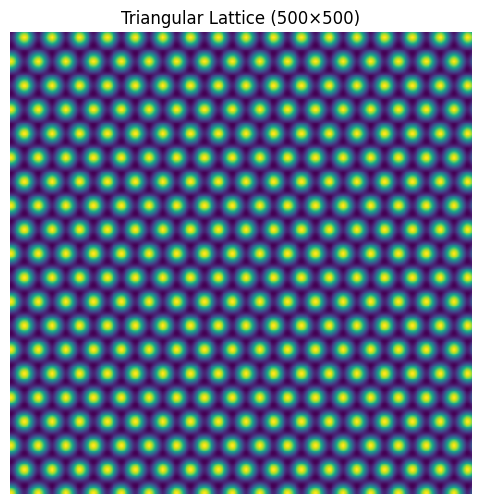

In [8]:
plt.figure(figsize=(6, 6))
plt.imshow(data, origin='lower', cmap='viridis', interpolation='nearest')
plt.title("Triangular Lattice (500×500)")
plt.axis('off')
plt.show()

In [9]:
 I_atom = generate_triangular_lattice(H=500, W=500, spacing=30, sigma=9, amplitude=1.0, center=(0,0))
 I_CDW = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=27, amplitude=1.0, center=(0,0))
 I_comb = I_atom + I_CDW*10

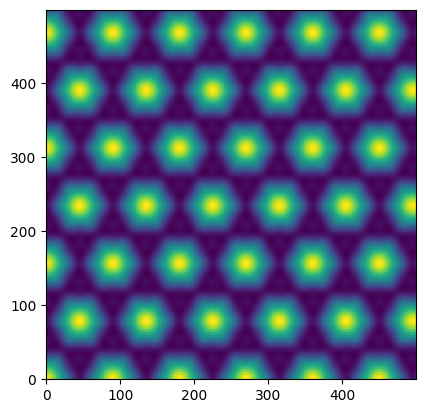

: 

In [ ]:
plt.imshow(I_comb, origin='lower', cmap='viridis', interpolation='nearest')